In [97]:
# Packages Import
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

# Setting default plot size
matplotlib.rcParams['figure.figsize'] = (12,8)

In [161]:
# Data Review
df = pd.read_csv(r'Data Scientist Job Roles.csv')
df.head()

# Add Remote/Onsite and Split City/Country in one step
df[['City', 'Country']] = df['Location'].str.split(",", n=1, expand=True)
df['Remote'] = df['Location'].str.contains('Remote').fillna(False).replace({True: 'Remote', False: 'Onsite'})

# Clean and adjust the Date column
df['Date'] = df['Date'].replace({'d': '', 'h': '1'}, regex=True).str.replace(r"\+", "", regex=True).astype(float)

# Adjust 30+ days with random values between 30-45
np.random.seed(1907)
df['Date'] = df['Date'].apply(lambda x: np.random.randint(30, 45) if x >= 27 else x)

# Drop the Location column
df = df.drop(columns=['Location'], errors='ignore')

# Salary Cleaning Function
def clean_salary(salary):
    # Remove non-numeric characters
    salary = re.sub(r'[^\d\.\-]', '', salary)
    
    if "Per Hour" in salary:
        # Convert hourly wage to annual salary (assuming 40 hours/week and 52 weeks/year)
        return float(salary) * 40 * 52 if salary.replace('.', '').isdigit() else None
    elif "-" in salary:
        try:
            # Split the salary range and calculate the average
            min_salary, max_salary = map(float, salary.split("-"))
            return ((min_salary + max_salary) / 2) * 1000
        except ValueError:
            return None
    else:
        # Convert to float and multiply by 1000 if it's a valid number
        return float(salary) * 1000 if salary.replace('.', '').isdigit() else None

# Data Cleaning Function
def clean_data(df):
    # Convert relevant columns to string before cleaning
    string_columns = ["Salary", "Company", "Job Title", "City", "Country", "Date"]
    df[string_columns] = df[string_columns].astype("string")
    
    # Drop rows with missing critical data
    df = df.dropna(subset=["Salary", "Company Score", "Skills"]).reset_index(drop=True)
    
    # Clean the salary column and ensure it is numeric (float)
    df['Estimation Type'] = df['Salary'].apply(lambda x: "Employer est." if "Employer est." in x else "Glassdoor est.")
    stop_words = ["(Glassdoor est.)", "(Employer est.)", "K", "£", "\xa0", "FCFA", "Per Hour"]
    df['Salary'] = df['Salary'].replace(stop_words, "", regex=True).str.strip()
    df['Salary'] = df['Salary'].apply(clean_salary)
    
    # Convert Salary column to float (or int if needed)
    df['Salary'] = df['Salary'].astype(float)
    
    # Clean and convert the Date column to float or int
    df['Date'] = df['Date'].replace({'d': '', 'h': '1'}, regex=True).str.replace(r"\+", "", regex=True).astype(float)
    
    # Randomize dates where applicable (for 30+ days)
    np.random.seed(1907)
    df['Date'] = df['Date'].apply(lambda x: np.random.randint(30, 45) if x >= 27 else x)
    
    # Convert Date to integer
    df['Date'] = df['Date'].astype(int)
    
    return df

# Cleaning the data
cleaned_data = clean_data(df)

# Review cleaned data
cleaned_data


,Company,Company Score,Job Title,Date,Salary,Skills,City,Country,Remote,Estimation Type
0,Razorpoint,3.4,Junior Data Scientist,3,35000.0,"Data mining, Big data, R, Data analysis skills...",Manchester,England,Onsite,Employer est.
1,tower Hamlets,3.7,Assistant Data Scientist (Graduate) | R-2375,5,31000.0,"R, SQL, JavaScript, Python",London,England,Onsite,Employer est.
2,TW,4.0,Data Scientist,31,57500.0,"SQL, Maths, Data science, Python",Nottingham,England,Onsite,Employer est.
3,NatWest Group,4.6,Data Scientist,2,47500.0,"Software deployment, Data analysis skills, Sta...",Edinburgh,Scotland,Onsite,Glassdoor est.
4,iwoca,3.9,Data Scientist - Ops,7,75000.0,"MATLAB, R, Maths, C, Machine learning",London,England,Onsite,Employer est.
...,...,...,...,...,...,...,...,...,...,...
630,Qureight Ltd,3.4,Senior Machine Learning Scientist/Engineer,13,52500.0,"Oracle, Cloud architecture, CSS, DevOps, PaaS",London,England,Onsite,Glassdoor est.
631,Causaly,3.5,Machine Learning Engineer,35,90000.0,"Data science, Account management, Communicatio...",London,England,Onsite,Glassdoor est.
632,GSK,3.8,Senior AI/ML Engineer - Computer Vision,30,41000.0,"TensorFlow, Cloud infrastructure, Software dep...",London,England,Onsite,Glassdoor est.
633,InstaDeep,3.7,"Applied Research Scientist, Explainable Deep L...",35,24000.0,"TensorFlow, Software deployment, NoSQL, Englis...",London,England,Onsite,Employer est.


In [149]:
print(cleaned_data.dtypes)

Company            string[python]
Company Score             float64
Job Title          string[python]
Date                        int64
Salary                    float64
Skills                     object
City               string[python]
Country            string[python]
Remote                     object
Estimation Type            object
dtype: object


<Axes: >

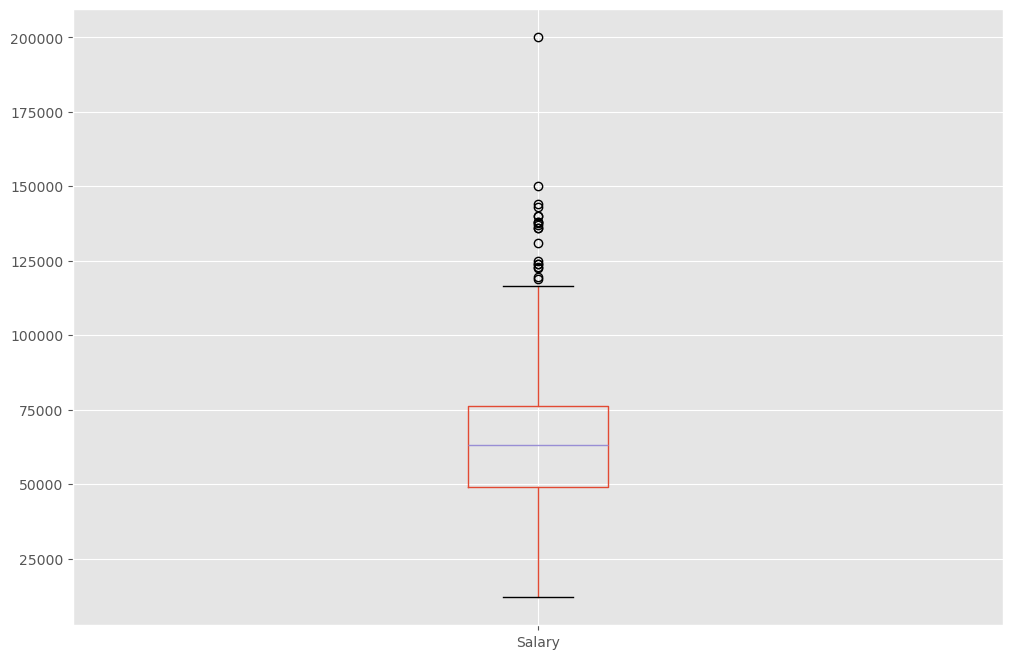

In [151]:
cleaned_data.boxplot(column=['Salary'])

In [155]:
cleaned_data.drop_duplicates()

,Company,Company Score,Job Title,Date,Salary,Skills,City,Country,Remote,Estimation Type
0,Razorpoint,3.4,Junior Data Scientist,3,35000.0,"Data mining, Big data, R, Data analysis skills...",Manchester,England,Onsite,Employer est.
1,tower Hamlets,3.7,Assistant Data Scientist (Graduate) | R-2375,5,31000.0,"R, SQL, JavaScript, Python",London,England,Onsite,Employer est.
2,TW,4.0,Data Scientist,31,57500.0,"SQL, Maths, Data science, Python",Nottingham,England,Onsite,Employer est.
3,NatWest Group,4.6,Data Scientist,2,47500.0,"Software deployment, Data analysis skills, Sta...",Edinburgh,Scotland,Onsite,Glassdoor est.
4,iwoca,3.9,Data Scientist - Ops,7,75000.0,"MATLAB, R, Maths, C, Machine learning",London,England,Onsite,Employer est.
...,...,...,...,...,...,...,...,...,...,...
630,Qureight Ltd,3.4,Senior Machine Learning Scientist/Engineer,13,52500.0,"Oracle, Cloud architecture, CSS, DevOps, PaaS",London,England,Onsite,Glassdoor est.
631,Causaly,3.5,Machine Learning Engineer,35,90000.0,"Data science, Account management, Communicatio...",London,England,Onsite,Glassdoor est.
632,GSK,3.8,Senior AI/ML Engineer - Computer Vision,30,41000.0,"TensorFlow, Cloud infrastructure, Software dep...",London,England,Onsite,Glassdoor est.
633,InstaDeep,3.7,"Applied Research Scientist, Explainable Deep L...",35,24000.0,"TensorFlow, Software deployment, NoSQL, Englis...",London,England,Onsite,Employer est.


In [163]:
cleaned_data.sort_values(by=['Salary'], inplace=False, ascending=False)

,Company,Company Score,Job Title,Date,Salary,Skills,City,Country,Remote,Estimation Type
115,Creative Artists Agency (CAA),4.3,Data Scientist,30,200000.0,"Software deployment, AWS, Maths, Docker, Machi...",London,England,Onsite,Employer est.
236,Starling Bank,4.0,Data Scientist (Marketing),30,150000.0,"Power BI, Azure, R, Google Cloud Platform, Tab...",London,England,Onsite,Employer est.
621,Fionics,4.1,Deep Learning Researcher (PhD) - HFT (Amsterdam),44,144000.0,"Azure, Go, Google Cloud Platform, Java, AWS",London,England,Onsite,Glassdoor est.
343,Luminance Technologies,3.7,Machine Learning Research Engineer,43,143000.0,"TensorFlow, R, Machine learning, Team manageme...",Cambridge,"East of England, England",Onsite,Glassdoor est.
263,Webtures,3.5,AI Analyst,12,140000.0,"TensorFlow, Deep learning, Natural language pr...",London,England,Onsite,Employer est.
...,...,...,...,...,...,...,...,...,...,...
514,Visa,4.2,Data Science Senior Manager,14,26000.0,"Data modelling, Sales, Data structures, Machin...",London,England,Onsite,Glassdoor est.
348,causaLens,5.0,Applied Data Scientist - Causal AI,34,26000.0,"Software deployment, AWS, Machine learning, Ne...",London,England,Onsite,Glassdoor est.
86,Capita,3.1,Pensions Data Scientist,43,24500.0,"Power BI, Azure, SQL, Machine learning, Data m...",Remote,<NA>,Remote,Glassdoor est.
633,InstaDeep,3.7,"Applied Research Scientist, Explainable Deep L...",35,24000.0,"TensorFlow, Software deployment, NoSQL, Englis...",London,England,Onsite,Employer est.


<Axes: xlabel='Salary', ylabel='Company Score'>

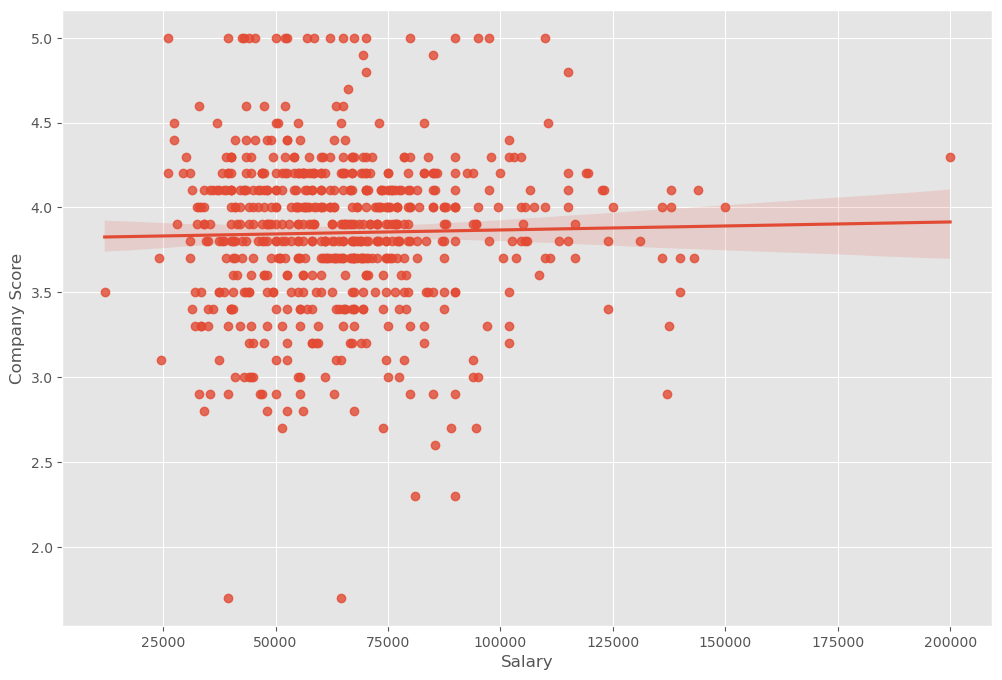

In [167]:
sns.regplot(x="Salary", y="Company Score", data=cleaned_data)

<Axes: xlabel='Salary', ylabel='Date'>

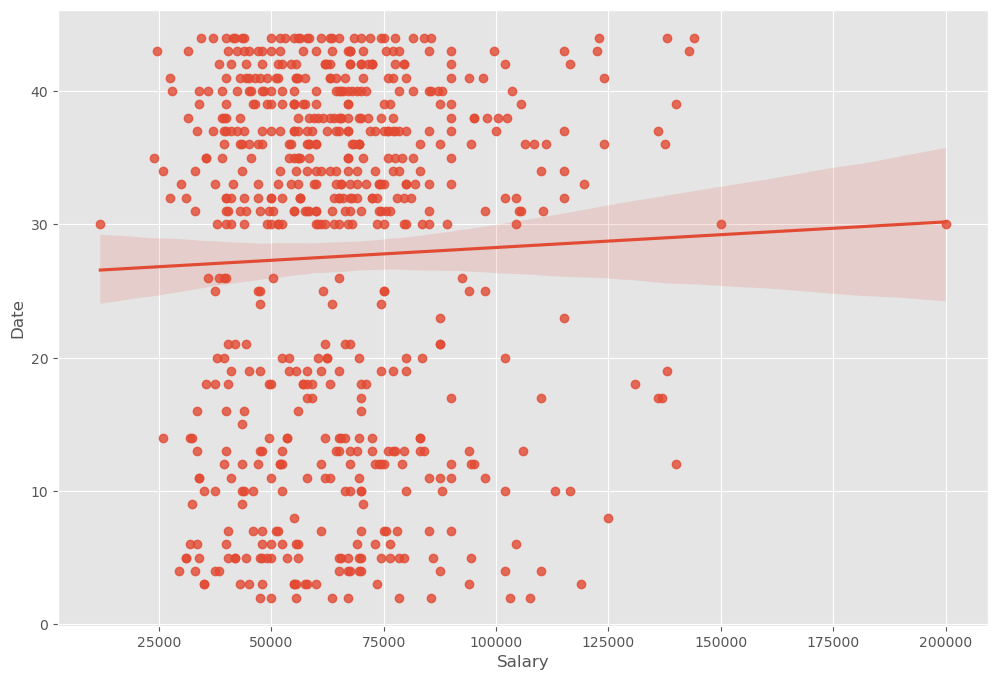

In [169]:
sns.regplot(x="Salary", y="Date", data=cleaned_data)

In [181]:
# Selecting only numeric columns
numeric_data = cleaned_data.select_dtypes(include=['number'])

               Company Score      Date    Salary
Company Score       1.000000  0.047540  0.023416
Date                0.047540  1.000000  0.033334
Salary              0.023416  0.033334  1.000000


In [183]:
numeric_data.corr(method='pearson')

,Company Score,Date,Salary
Company Score,1.000000,0.047540,0.023416
Date,0.047540,1.000000,0.033334
Salary,0.023416,0.033334,1.000000


In [185]:
numeric_data.corr(method='kendall')

,Company Score,Date,Salary
Company Score,1.000000,0.031346,0.008289
Date,0.031346,1.000000,0.019942
Salary,0.008289,0.019942,1.000000


In [187]:
numeric_data.corr(method='spearman')

,Company Score,Date,Salary
Company Score,1.000000,0.044826,0.010484
Date,0.044826,1.000000,0.030023
Salary,0.010484,0.030023,1.000000


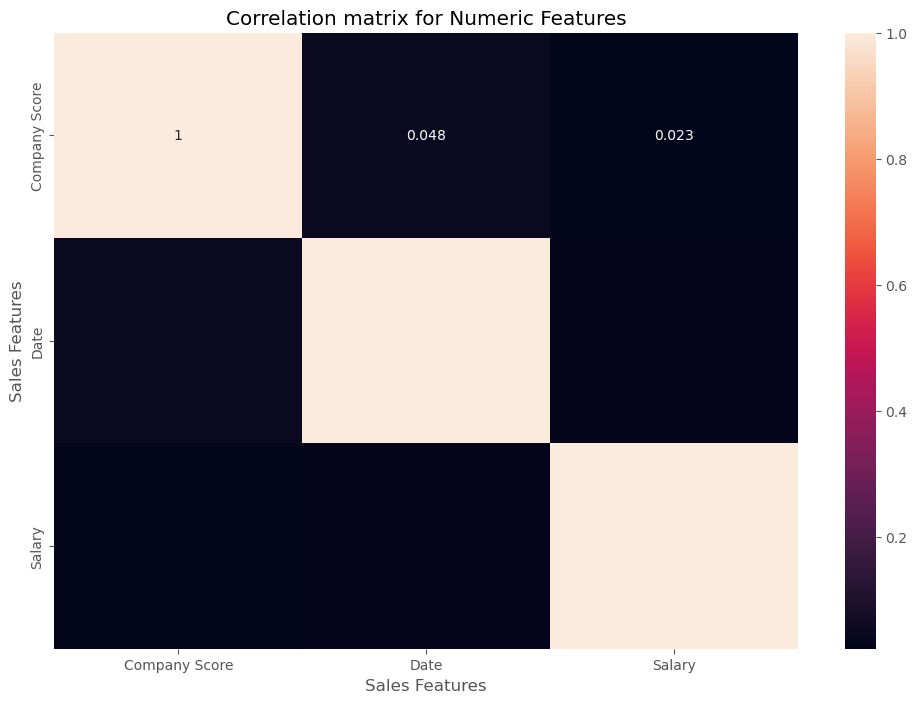

In [189]:
correlation_matrix = numeric_data.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Sales Features")

plt.ylabel("Sales Features")

plt.show()

In [191]:
cleaned_data.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,Company,Company Score,Job Title,Date,Salary,Skills,City,Country,Remote,Estimation Type
Company,1.000000,-0.035515,0.665432,0.110051,0.309317,0.687816,0.153678,0.063555,-0.035717,0.105065
Company Score,-0.035515,1.000000,-0.056056,0.006893,-0.023984,-0.036852,-0.059911,-0.038695,0.078215,-0.000781
Job Title,0.665432,-0.056056,1.000000,0.105991,0.379761,0.836343,0.035720,-0.017539,0.006748,0.100402
Date,0.110051,0.006893,0.105991,1.000000,0.057906,0.122534,-0.034447,-0.019222,0.001725,0.036482
Salary,0.309317,-0.023984,0.379761,0.057906,1.000000,0.388293,0.093306,0.035784,-0.035123,0.193428
Skills,0.687816,-0.036852,0.836343,0.122534,0.388293,1.000000,0.030842,-0.001872,-0.019012,0.125763
City,0.153678,-0.059911,0.035720,-0.034447,0.093306,0.030842,1.000000,0.352753,-0.096275,0.022094
Country,0.063555,-0.038695,-0.017539,-0.019222,0.035784,-0.001872,0.352753,1.000000,-0.241126,0.042043
Remote,-0.035717,0.078215,0.006748,0.001725,-0.035123,-0.019012,-0.096275,-0.241126,1.000000,-0.022604
Estimation Type,0.105065,-0.000781,0.100402,0.036482,0.193428,0.125763,0.022094,0.042043,-0.022604,1.000000


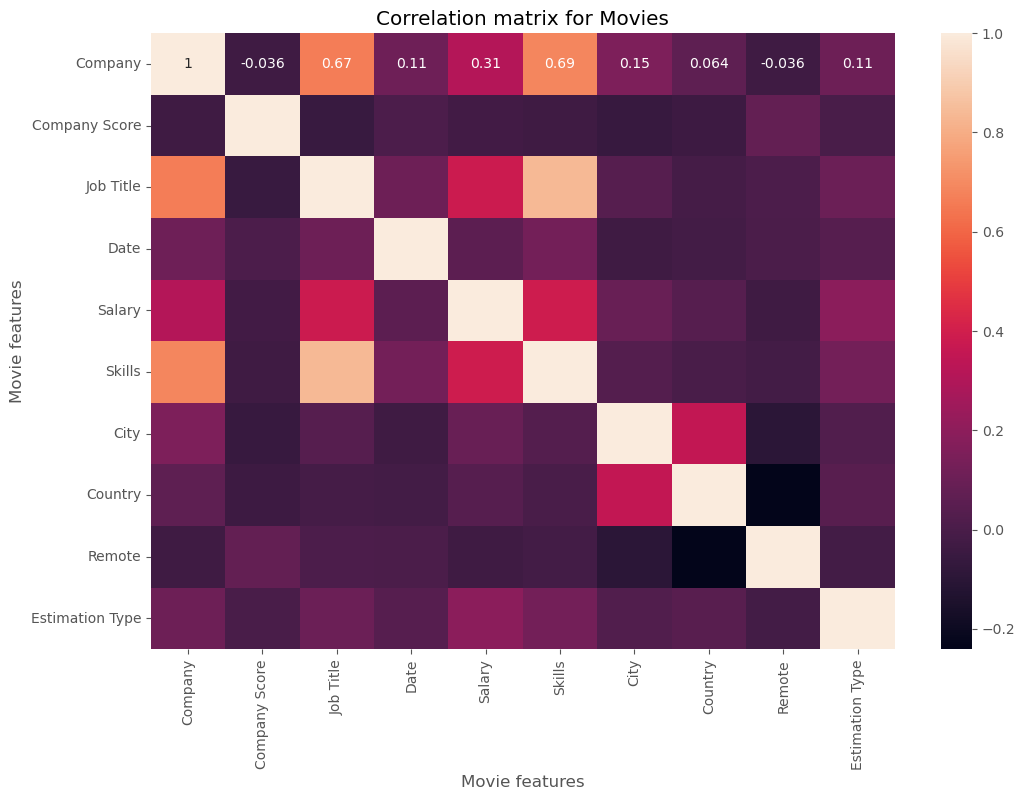

In [193]:
correlation_matrix = cleaned_data.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [195]:
correlation_mat = cleaned_data.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

Company          Company            1.000000
                 Company Score     -0.035515
                 Job Title          0.665432
                 Date               0.110051
                 Salary             0.309317
                                      ...   
Estimation Type  Skills             0.125763
                 City               0.022094
                 Country            0.042043
                 Remote            -0.022604
                 Estimation Type    1.000000
Length: 100, dtype: float64


In [197]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

Country    Remote          -0.241126
Remote     Country         -0.241126
           City            -0.096275
City       Remote          -0.096275
           Company Score   -0.059911
                              ...   
Company    Company          1.000000
Salary     Salary           1.000000
Country    Country          1.000000
Skills     Skills           1.000000
Job Title  Job Title        1.000000
Length: 100, dtype: float64


In [199]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

Job Title        Company            0.665432
Company          Job Title          0.665432
Skills           Company            0.687816
Company          Skills             0.687816
Skills           Job Title          0.836343
Job Title        Skills             0.836343
Estimation Type  Estimation Type    1.000000
Company Score    Company Score      1.000000
Date             Date               1.000000
City             City               1.000000
Remote           Remote             1.000000
Company          Company            1.000000
Salary           Salary             1.000000
Country          Country            1.000000
Skills           Skills             1.000000
Job Title        Job Title          1.000000
dtype: float64


In [205]:
# Looking at the top 15 job title by salary

JobTitleSalarySum = cleaned_data.groupby('Job Title')[["Salary"]].sum()

JobTitleSalarySumSorted = JobTitleSalarySum.sort_values('Salary', ascending = False)[:15]

JobTitleSalarySumSorted = JobTitleSalarySumSorted['Salary'].astype('int64') 

JobTitleSalarySumSorted

Job Title
Data Scientist                        3865500
Senior Data Scientist                 2367000
Machine Learning Engineer             1104000
Lead Data Scientist                    604500
Senior Machine Learning Engineer       385000
Director of Data Science               331500
Principal Data Scientist               312500
Data Analyst                           268500
Data Analytics Manager                 254500
Machine Learning Research Engineer     230500
Head of Data & Analytics               217000
Senior Research Statistician           207500
Data Science Manager                   198500
AI Engineer                            192000
Data Scientist (Fincrime)              184000
Name: Salary, dtype: int64

In [211]:
CompanySalarySum = cleaned_data.groupby(['Company', 'Job Title'])[["Salary"]].sum()
CompanySalarySum

Salary
Company                         Job Title                                                  
AWS EMEA SARL (UK Branch)       Generative AI Specialist SA                         65000.0
                                Sr. Applied Scientist, AWS Prototyping              77500.0
AWS EMEA SARL (UK Branch) - F93 Deep Learning Architect, Generative AI Innovati...  79500.0
AWTG                            AI / ML Engineers                                   55000.0
AXA UK                          Data Science & AI Manager                           40000.0
...                                                                                     ...
marshmallow                     Senior Pricing Data Scientist, Retail pricing team  75500.0
                                Senior/Lead Pricing Data Scientist, Net pricing...  57500.0
o9 Solutions                    Principal Data Scientist                            73000.0
tower Hamlets                   Assistant Data Scientist (Graduate) | R-2375        31000.0
yellow brick road               Senior Machine Learning Engineer (UK)               43500.0

[634 rows x 1 columns]

In [213]:
CompanySalarySumSorted = CompanySalarySum.sort_values(['Salary', 'Company', 'Job Title'], ascending = False)[:15]

CompanySalarySumSorted = CompanySalarySumSorted['Salary'].astype('int64')

CompanySalarySumSorted

Company                        Job Title                                           
Creative Artists Agency (CAA)  Data Scientist                                          200000
Starling Bank                  Data Scientist (Fincrime)                               184000
                               Data Scientist (Marketing)                              150000
Fionics                        Deep Learning Researcher (PhD) - HFT (Amsterdam)        144000
Luminance Technologies         Machine Learning Research Engineer                      143000
Webtures                       AI Analyst                                              140000
HEOR                           Senior Data Scientist / Statistician                    140000
Samsung Electronics            Intern – Machine Learning (Speech) - Immediate Start    138000
Learna Ltd                     Data Analytics Manager                                  138000
CoMind                         Senior Research Statistician           

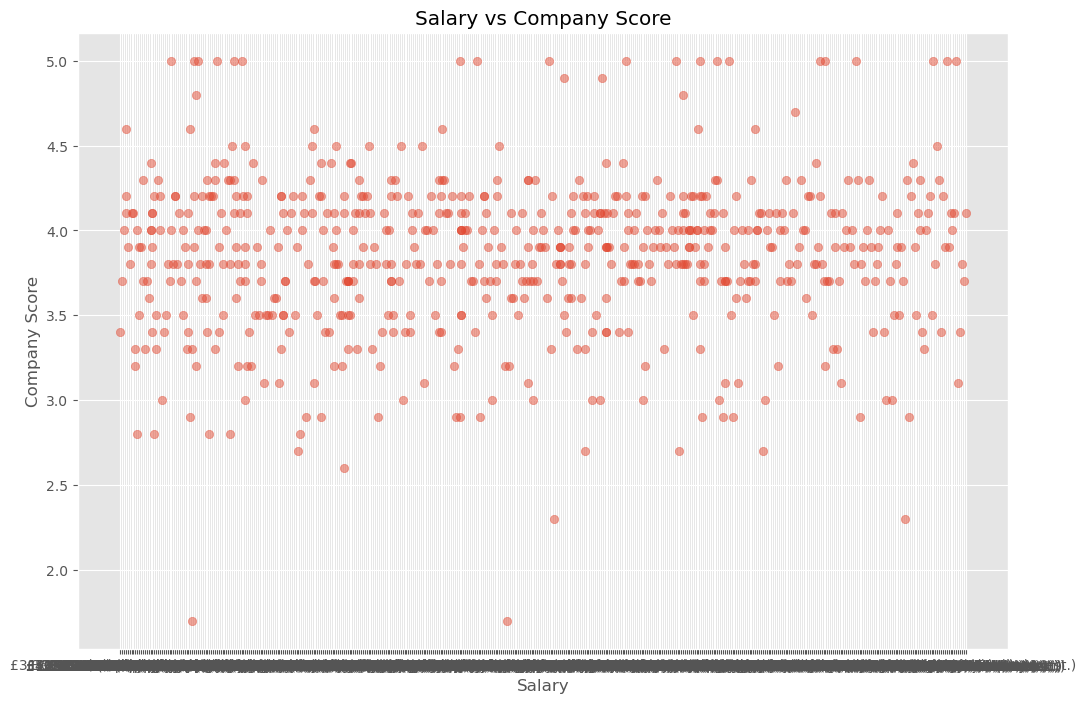

In [217]:
# Remove rows with missing values in 'Salary' or 'Company Score'
df_cleaned = df.dropna(subset=['Salary', 'Company Score'])

# Scatter plot with the cleaned DataFrame
plt.scatter(x=df_cleaned['Salary'], y=df_cleaned['Company Score'], alpha=0.5)
plt.title('Salary vs Company Score')
plt.xlabel('Salary')
plt.ylabel('Company Score')
plt.show()